Define function to generate ticks and labels

In [1]:
def ticks_labels(
    xmin, xmax, ymin, ymax, xspacing, yspacing
    ):
    '''
    # input ----
    xmin, xmax, ymin, ymax: range of labels
    xspacing: spacing of x ticks
    yspacing: spacing of y ticks
    
    # output ----
    xticks_pos, xticks_label, yticks_pos, yticks_label
    '''
    
    import numpy as np
    
    # get the x ticks
    xticks_pos = np.arange(xmin, xmax + xspacing, xspacing)
    if not isinstance(xspacing, int):
        xticks_pos = np.around(xticks_pos, 1)
    
    # Associate with '° W', '°', and '° E'
    xticks_label = [''] * len(xticks_pos)
    for i in np.arange(len(xticks_pos)):
        if (abs(xticks_pos[i]) == 180) | (xticks_pos[i] == 0):
            xticks_label[i] = str(abs(xticks_pos[i])) + '°'
        elif xticks_pos[i] < 0:
            xticks_label[i] = str(abs(xticks_pos[i])) + '° W'
        elif xticks_pos[i] > 0:
            xticks_label[i] = str(xticks_pos[i]) + '° E'
    
    # get the y ticks
    yticks_pos = np.arange(ymin, ymax + yspacing, yspacing)
    if not isinstance(yspacing, int):
        yticks_pos = np.around(yticks_pos, 1)
    
    # Associate with '° N', '°', and '° S'
    yticks_label = [''] * len(yticks_pos)
    for i in np.arange(len(yticks_pos)):
        if yticks_pos[i] < 0:
            yticks_label[i] = str(abs(yticks_pos[i])) + '° S'
        if yticks_pos[i] == 0:
            yticks_label[i] = str(yticks_pos[i]) + '°'
        if yticks_pos[i] > 0:
            yticks_label[i] = str(yticks_pos[i]) + '° N'
    
    return xticks_pos, xticks_label, yticks_pos, yticks_label

'''
xmin = -180; xmax = 180; ymin = -90; ymax = 90; xspacing = 60; yspacing = 30
xticks_pos = np.arange(xmin, xmax + xspacing, xspacing)
ddd = ticks_labels(xmin, xmax, ymin, ymax, xspacing, yspacing)
'''


'\nxmin = -180; xmax = 180; ymin = -90; ymax = 90; xspacing = 60; yspacing = 30\nxticks_pos = np.arange(xmin, xmax + xspacing, xspacing)\nddd = ticks_labels(xmin, xmax, ymin, ymax, xspacing, yspacing)\n'

Define function to plot maps

In [2]:
def framework_plot1(
    which_area,
    xlabel = None,
    output_png=None,
    dpi=600,
    figsize=None,
    country_boundaries=True, border_color = 'black',
    gridlines=True, grid_color = 'gray',
    ticks_and_labels = True,
    lw=0.25, labelsize=10, extent=None, ticklabel = None,
    plot_scalebar = True,
    scalebar_elements={'bars': 2, 'length': 200, 'location': (0.02, 0.015),
                       'barheight': 20, 'linewidth': 0.15, 'col': 'black',
                       'middle_label': False},
    set_figure_margin = True,
    figure_margin=None,
    ):
    '''
    ----Input
    which_area: indicate which area to plot, {
        'global', 'self_defined', '12km_out', }
    
    figsize: figure size
    
    ----output
    
    
    '''
    
    import numpy as np
    import cartopy.feature as cfeature
    import matplotlib.ticker as mticker
    import cartopy as ctp
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rc('font', family='Times New Roman', size=10)
    
    transform = ctp.crs.PlateCarree()
    
    if which_area == '12km_out':
        extent = [-35, 0, 10, 45]
        ticklabel = ticks_labels(-30, 0, 10, 40, 10, 10)
        plot_scalebar = False
        if (figsize is None):
            figsize = np.array([8.8, 8]) / 2.54
        if (figure_margin is None) & (set_figure_margin):
            figure_margin = {
                'left': 0.12, 'right': 0.96, 'bottom': 0.05, 'top': 0.995
            }
    
    if which_area == 'global':
        extent = [-180, 180, -90, 90]
        ticklabel = ticks_labels(-180, 180, -90, 90, 60, 30)
        plot_scalebar = False
        lw = 0.1
        if (figure_margin is None) & (set_figure_margin):
            figure_margin = {
                'left': 0.06, 'right': 0.97, 'bottom': 0.05, 'top': 0.995
            }
        if (figsize is None):
            figsize = np.array([8.8*2, 8.8]) / 2.54
    
    if which_area == 'self_defined':
        extent = extent
        ticklabel = ticklabel
        plot_scalebar = False
        if (figsize is None):
            figsize = np.array([8.8, 8.8]) / 2.54
    
    fig, ax = plt.subplots(
        1, 1, figsize=figsize, subplot_kw={'projection': transform}, dpi=dpi)
    
    ax.set_extent(extent, crs = transform)
    if ticks_and_labels:
        ax.set_xticks(ticklabel[0])
        ax.set_xticklabels(ticklabel[1])
        ax.set_yticks(ticklabel[2])
        ax.set_yticklabels(ticklabel[3])
        ax.tick_params(length=2, labelsize=labelsize)
    
    if country_boundaries:
        coastline = cfeature.NaturalEarthFeature(
            'physical', 'coastline', '10m', edgecolor=border_color,
            facecolor='none', lw=lw)
        ax.add_feature(coastline, zorder=2)
        borders = cfeature.NaturalEarthFeature(
            'cultural', 'admin_0_boundary_lines_land', '10m',
            edgecolor=border_color,
            facecolor='none', lw=lw)
        ax.add_feature(borders, zorder=2)
    
    if gridlines:
        gl = ax.gridlines(crs=transform, linewidth=lw, zorder=2,
                          color=grid_color, alpha=0.5, linestyle='--')
        gl.xlocator = mticker.FixedLocator(ticklabel[0])
        gl.ylocator = mticker.FixedLocator(ticklabel[2])
    
    if plot_scalebar:
        scale_bar(ax, bars=scalebar_elements['bars'],
                  length=scalebar_elements['length'],
                  location=scalebar_elements['location'],
                  barheight=scalebar_elements['barheight'],
                  linewidth=scalebar_elements['linewidth'],
                  col=scalebar_elements['col'],
                  middle_label=scalebar_elements['middle_label'])
    
    if set_figure_margin & (not(figure_margin is None)):
        fig.subplots_adjust(
            left=figure_margin['left'], right=figure_margin['right'],
            bottom=figure_margin['bottom'], top=figure_margin['top'])
    else:
        fig.tight_layout()
    
    if (not(output_png is None)):
        fig.savefig(output_png, dpi=dpi)
    else:
        return fig, ax



Plot the global map

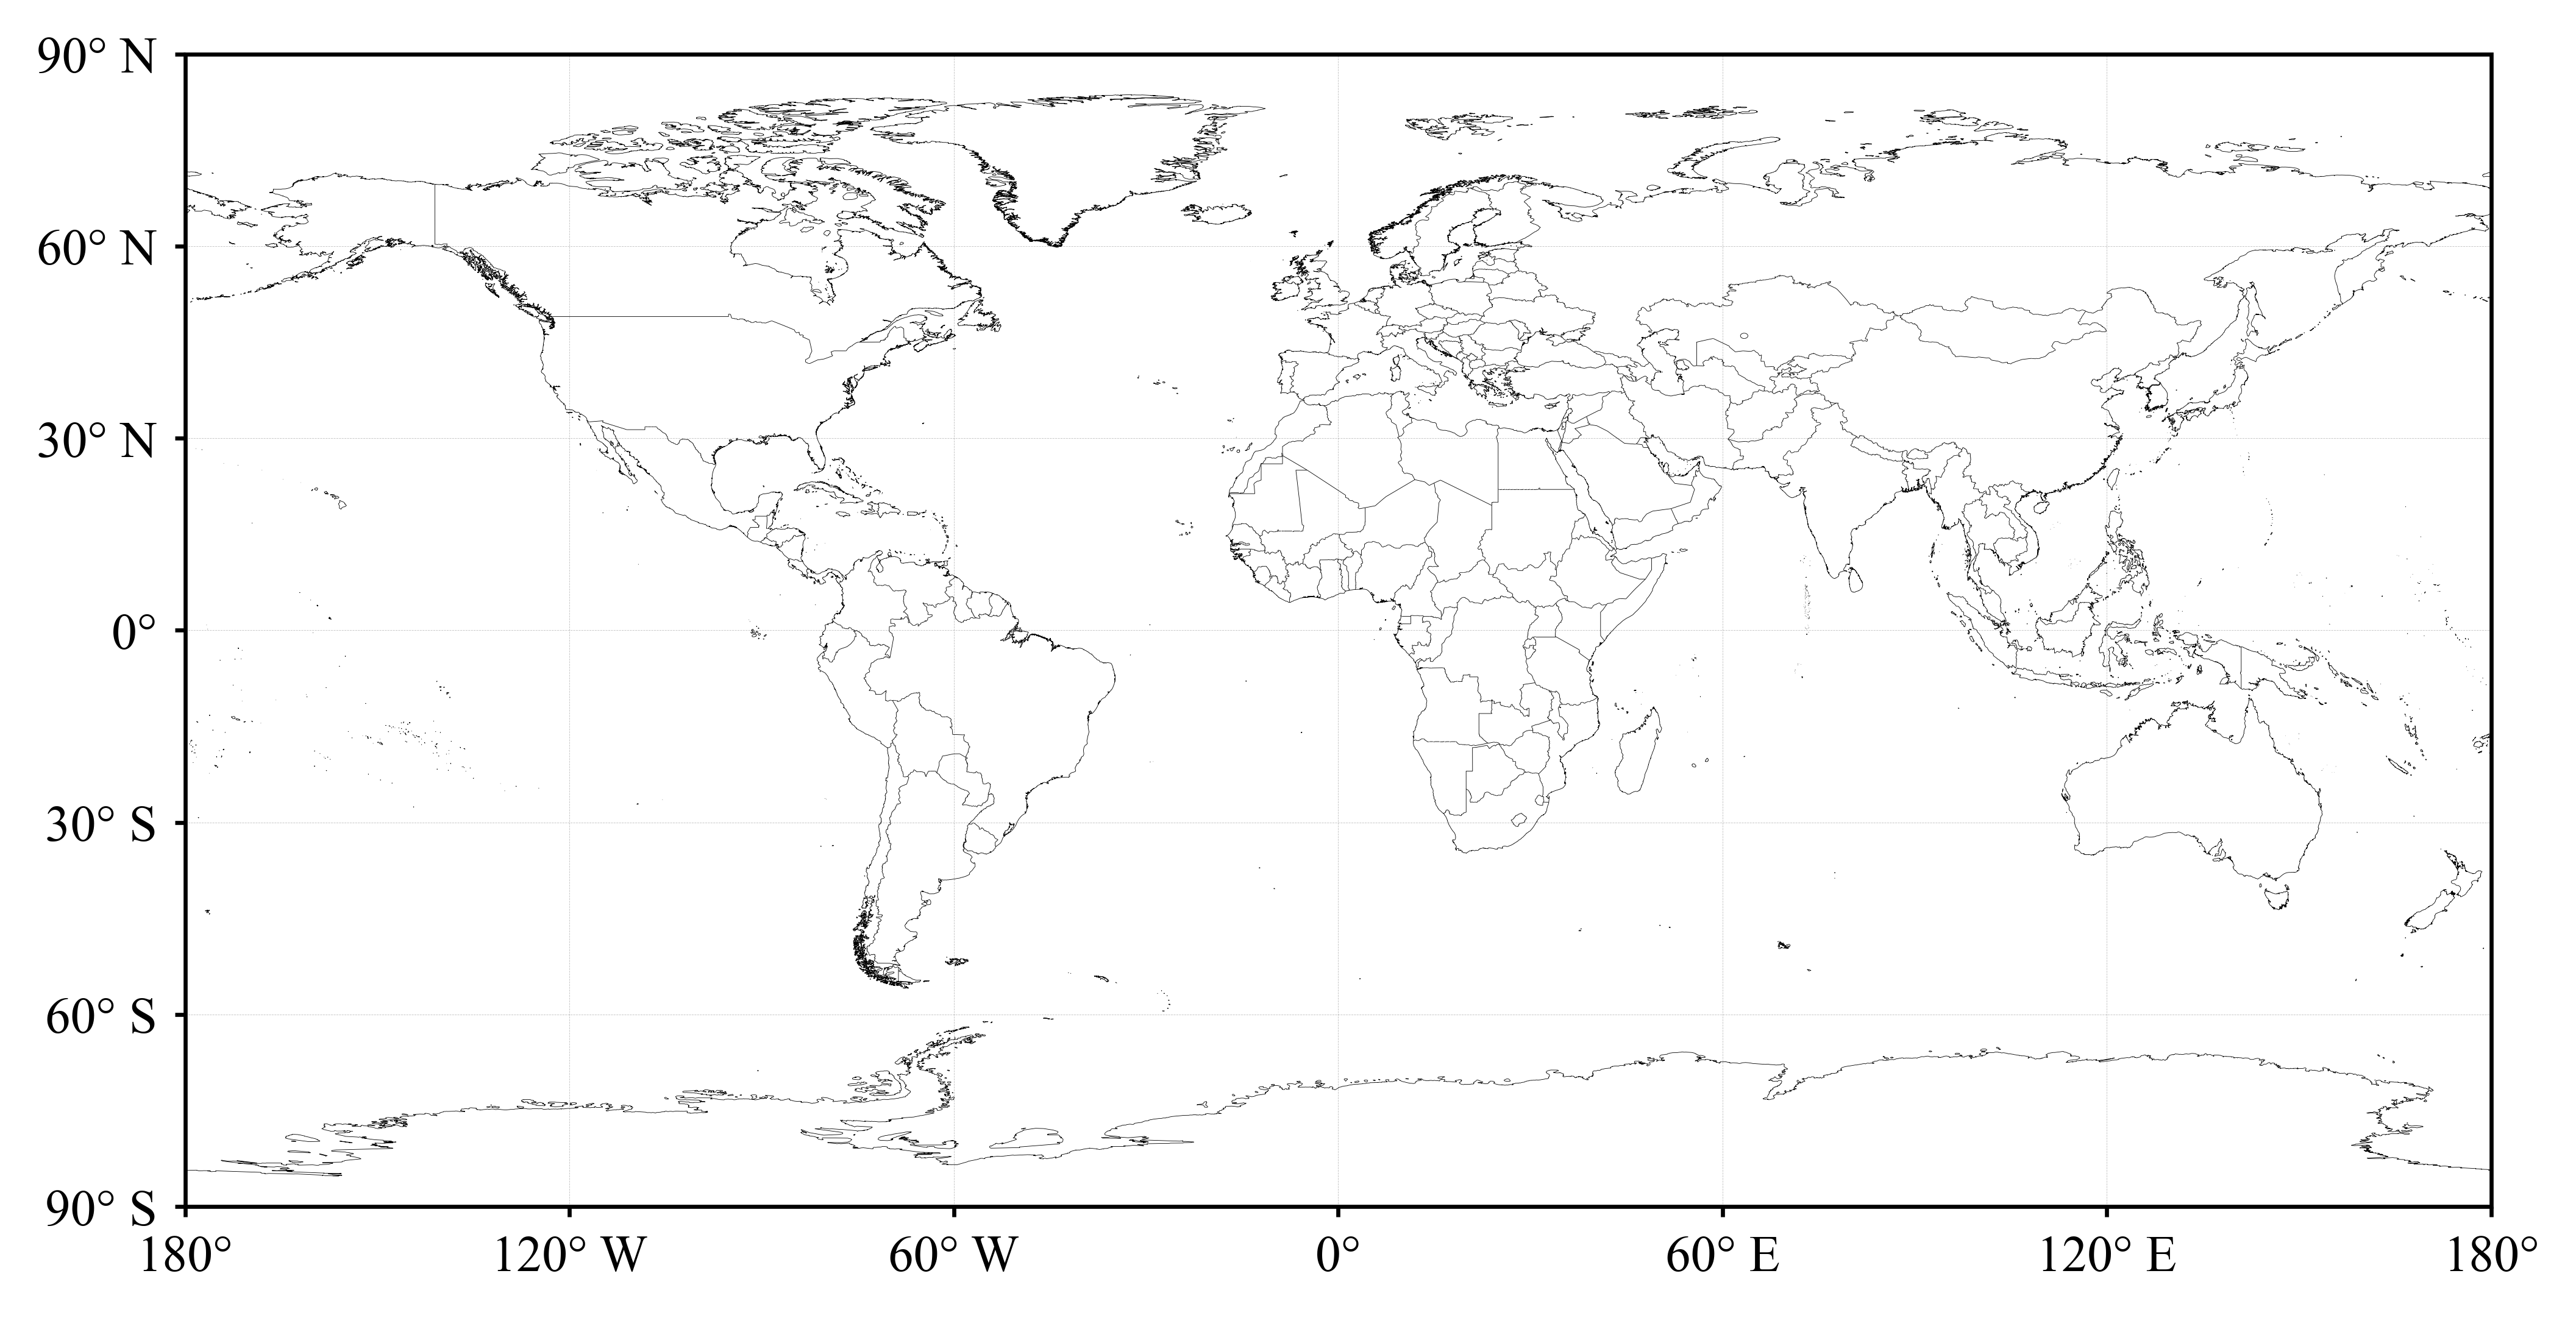

In [4]:
import matplotlib.pyplot as plt

fig, ax = framework_plot1("global")
plt.show()